# 데이터 전처리

In [366]:
import pandas as pd
from datetime import datetime

perform_df = pd.read_json('datas/raw_data/raw_perform.json')
rating_df = pd.read_json('datas/raw_data/raw_rating.json')

# Datetime으로 변환

perform_df['방송일시'] = list(map(lambda i : datetime.fromtimestamp(i/1000), perform_df['방송일시']))

In [185]:
perform_df['상품명']

0                   테이트 남성 셀린니트3종
1                   테이트 여성 셀린니트3종
2                   테이트 남성 셀린니트3종
3                   테이트 여성 셀린니트3종
4                   테이트 남성 셀린니트3종
                   ...           
38304    삼성화재 행복한파트너 주택화재보험(1912)
38305    삼성화재 행복한파트너 주택화재보험(1912)
38306    삼성화재 행복한파트너 주택화재보험(1912)
38307          더케이 예다함 상조서비스(티포트)
38308          더케이 예다함 상조서비스(티포트)
Name: 상품명, Length: 38309, dtype: object

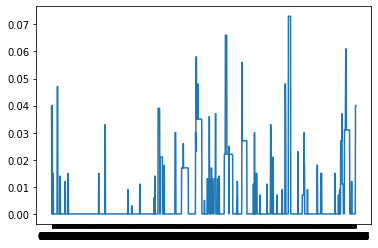

In [34]:
import matplotlib.pyplot as plt
plt.plot(rating_df.set_index('시간대').sort_index()['2019-01-02'])
plt.title('시간대별 시청률 변화')
plt.rcParams['font.family'] = 'NanumGothic'

## 상관분석 (실적 / 평균 시청률)
고려사항 1. 같은 마더코드를 공유하는 제품끼리 계산하여 -1~1사이의 값으로 변경

In [387]:
# 취급액 int형식으로 변경
perform_df[' 취급액 '] = list(map(lambda i : int(i.replace(',','')) if i != None else None, perform_df[' 취급액 ']))

In [8]:
import copy
avg_item = copy.deepcopy(perform_df.groupby('마더코드').mean())[['노출(분)',' 취급액 ']]

In [9]:
avg_item

,노출(분),취급액
마더코드,,
100000,19.166667,1.276033e+07
100001,30.000000,3.783400e+07
100002,20.000000,3.808313e+07
100006,10.000000,1.011230e+07
100009,20.000000,3.074067e+07
...,...,...
100844,19.939759,3.715889e+07
100845,22.105263,5.365816e+06
100846,20.000000,1.328808e+07


In [61]:
perform_df.set_index('마더코드', inplace=True)
perform_df['실적평균'] = avg_item[' 취급액 ' ]

In [63]:
perform_df['실적비율'] = perform_df[' 취급액 '] / perform_df['실적평균']

In [67]:
# 평균 시청률
# 날짜 먼저 탐색 후 해당하는 시간대 평균 시청률 계산

In [85]:
rating_df.set_index('시간대', inplace = True)

In [144]:
rating_df.sort_index()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
00:00,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:01,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:02,0.0,0.023,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:03,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.000,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
00:04,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.018,0.013,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:55,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.036,0.000,0.0,0.0,0.0,0.024
23:56,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.036,0.000,0.0,0.0,0.0,0.024
23:57,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.050,0.000,0.0,0.0,0.0,0.024


In [120]:
perform_df['방송날짜'] = list(map(lambda i : i.date(), perform_df['방송일시']))

In [124]:
import datetime
perform_df = perform_df[perform_df['방송날짜'] <= datetime.date(2019,12,31)]

In [101]:
rating_df[str(perform_df.iloc[0]['방송일시'])[:10]][str(perform_df.iloc[0]['방송일시'])[11:16]:str(perform_df.iloc[0]['방송일시'] + timedelta(minutes = int(perform_df.iloc[0]['노출(분)'])))[11:16]].mean()

0.008714285714285716

In [125]:
perform_df['평균시청률'] = list(map(lambda i : rating_df[str(i['방송일시'])[:10]][str(i['방송일시'])[11:16]:str(i['방송일시'] + timedelta(minutes = int(i['노출(분)'])))[11:16]].mean(), perform_df.iloc))

In [99]:
perform_df.iloc[0]['방송일시'] + timedelta(minutes = int(perform_df.iloc[0]['노출(분)']))

Timestamp('2019-01-01 15:20:00')

In [95]:
perform_df.iloc[0]['방송일시'] - perform_df.iloc[1]['방송일시']

Timedelta('0 days 00:00:00')

In [98]:
timedelta(minutes = 1)

datetime.timedelta(seconds=60)

In [149]:
perform_df[perform_df['평균시청률']!=0].dropna()['norm실적'].corr(perform_df[perform_df['평균시청률']!=0].dropna()['평균시청률'], method='pearson')

-0.013194143396904749

In [150]:
perform_df[perform_df['상품군'] == '의류'].dropna()['norm실적'].corr(perform_df[perform_df['상품군'] == '의류'].dropna()['평균시청률'], method='pearson')

0.02057105472832569

In [147]:
from sklearn import preprocessing
x = perform_df['실적비율'].values.reshape(-1,1)
scaler = preprocessing.MaxAbsScaler()
x_scaled = scaler.fit_transform(x)
perform_df['norm실적'] = x_scaled

In [155]:
perform_df.corr()

,노출(분),상품코드,취급액,실적평균,실적비율,평균시청률,norm실적
노출(분),1.000000,0.081625,0.028063,0.007350,0.018855,0.007857,0.018855
상품코드,0.081625,1.000000,-0.015572,-0.022656,-0.000604,0.003778,-0.000604
취급액,0.028063,-0.015572,1.000000,0.691273,0.599355,0.007075,0.599355
실적평균,0.007350,-0.022656,0.691273,1.000000,0.000358,0.019220,0.000358
실적비율,0.018855,-0.000604,0.599355,0.000358,1.000000,-0.007275,1.000000
평균시청률,0.007857,0.003778,0.007075,0.019220,-0.007275,1.000000,-0.007275
norm실적,0.018855,-0.000604,0.599355,0.000358,1.000000,-0.007275,1.000000


### 상품명, 실적 별 상관성 분석

In [126]:
item_names = list(map(lambda i : i.split() ,perform_df['상품명']))
perform_df['상품토큰'] = item_names

In [127]:
import nltk
import itertools
total_token = list(itertools.chain(*list(perform_df['상품토큰'])))
fdist = nltk.FreqDist(total_token)
temp_df = pd.DataFrame(list(zip(fdist.keys(), fdist.values())), columns= ['word', 'count'])

In [135]:
temp_df

,word,count
0,테이트,121
1,남성,1604
2,셀린니트3종,10
3,여성,1347
4,오모떼,266
...,...,...
2572,행복한파트너,3
2573,주택화재보험(1912),3
2574,더케이,2
2575,예다함,2


In [170]:
temp_df['per'] = 0

In [161]:
temp_df.set_index('word', inplace=True)

In [171]:
temp_df

,count,per
word,,
테이트,121,0
남성,1604,0
셀린니트3종,10,0
여성,1347,0
오모떼,266,0
...,...,...
행복한파트너,3,0
주택화재보험(1912),3,0
더케이,2,0


In [136]:
perform_df.iloc[0][' 취급액 ']

2099000.0

In [98]:
def cal_per(x):
    temp = pd.DataFrame(x['상품토큰'], columns = ['word']).set_index('word').groupby('word').sum()
    temp['per'] = x[' 취급액 ']
    temp_df['per'] += temp['per']

In [99]:
perform_df.dropna(inplace=True)

In [114]:
perform_df[' 취급액 ']

0          2099000.0
1          4371000.0
2          3262000.0
3          6955000.0
4          6672000.0
            ...     
38299     10157000.0
38300     50929000.0
38301    104392000.0
38302     13765000.0
38303     46608000.0
Name:  취급액 , Length: 37372, dtype: float64

In [173]:
for x in perform_df.iloc:
    temp = pd.DataFrame(x['상품토큰'], columns = ['word']).set_index('word').groupby('word').sum()
    temp['per'] = x[' 취급액 ']
    temp_df['per'][temp.index] += temp['per']

In [195]:
temp_df.loc[['남성','여성']]['per'] #/ temp_df.iloc[['남성','여성']]['count']

word
남성    3.519939e+10
여성    2.136441e+10
Name: per, dtype: float64

In [197]:
temp_df['avg'] = temp_df['per'] / temp_df['count']

In [175]:
temp_df.to_json('datas/result_data/token_perform.json')

## 많이 팔리는 시간대 탐색
상품군별 분류도 필요

In [386]:
perform_df#['방송일시'][150:180]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,시간대
0,2019-01-01 15:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",15
1,2019-01-01 15:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",15
2,2019-01-01 15:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",15
3,2019-01-01 15:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",15
4,2019-01-01 15:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",15
...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 09:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,None,9
38305,2020-01-01 09:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,None,9
38306,2020-01-01 10:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,None,10
38307,2020-01-01 10:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,None,10


In [367]:
perform_df['시간대'] = list(map(lambda i : i.time().hour, perform_df['방송일시']))

In [369]:
perform_df[['방송일시','시간대']].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [370]:
perform_df['시간대'].unique()

array([15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11], dtype=int64)

In [408]:
datas = perform_df.dropna().groupby('시간대').mean()[' 취급액 ']

In [410]:
datas.sort_values(ascending=False)

시간대
2     3.769072e+07
1     3.627257e+07
3     3.056566e+07
0     2.795010e+07
18    2.633055e+07
22    2.463590e+07
23    2.425382e+07
20    2.368955e+07
19    2.339261e+07
17    2.228338e+07
4     2.177750e+07
16    2.144783e+07
21    2.079351e+07
5     1.973450e+07
6     1.863920e+07
8     1.846754e+07
7     1.667212e+07
9     1.658717e+07
11    1.520460e+07
15    1.316934e+07
10    1.037960e+07
Name:  취급액 , dtype: float64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22, 23]

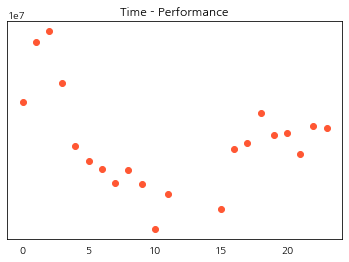

In [405]:
plt.scatter(datas.index, datas, color='#FF5733')
plt.tick_params(
    bottom=False,      # ticks along the bottom edge are off
    # labelbottom=False,
    left=False,
    labelleft=False

    ) # labels along the bottom edge are off
# plt.xticks(list(datas.index))
plt.title('Time - Performance')
plt.show()

In [360]:
datas

시간대
0     2.795010e+07
1     3.627257e+07
2     3.769072e+07
3     3.056566e+07
4     2.177750e+07
5     1.973450e+07
6     1.863920e+07
7     1.667212e+07
8     1.846754e+07
9     1.658717e+07
10    1.037960e+07
11    1.520460e+07
15    1.316934e+07
16    2.144783e+07
17    2.228338e+07
18    2.633055e+07
19    2.339261e+07
20    2.368955e+07
21    2.079351e+07
22    2.463590e+07
23    2.425382e+07
Name:  취급액 , dtype: float64

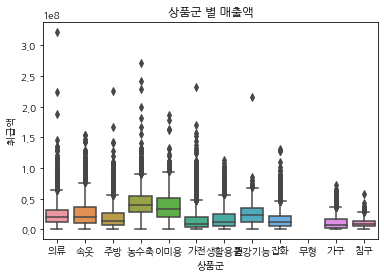

In [419]:
import seaborn as sns
sns.boxplot(x = "상품군", y = " 취급액 ", data = perform_df)
plt.title('상품군 별 매출액')
plt.show()

In [301]:
datas = perform_df[perform_df['시간대'] == 0].dropna()[' 취급액 '].values
datas.sort()

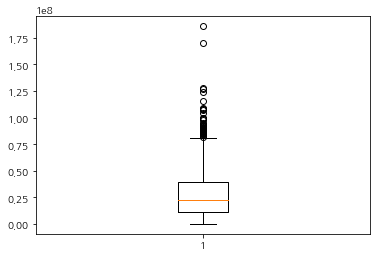

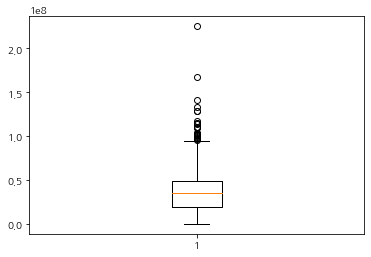

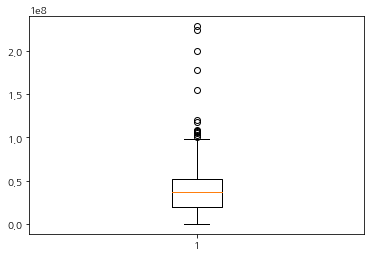

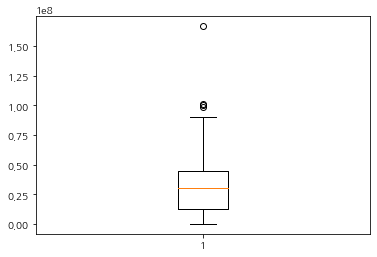

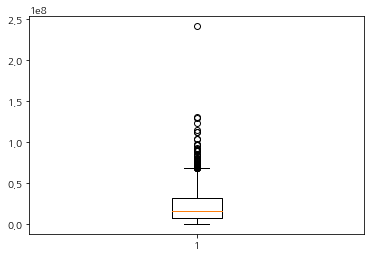

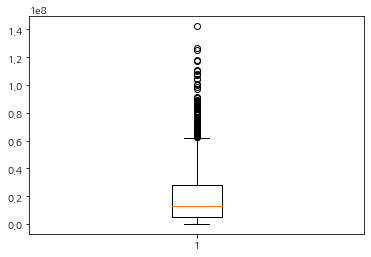

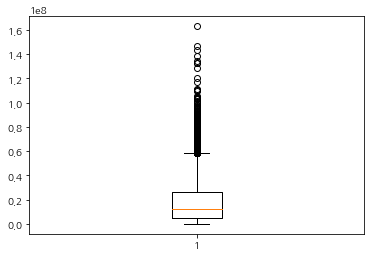

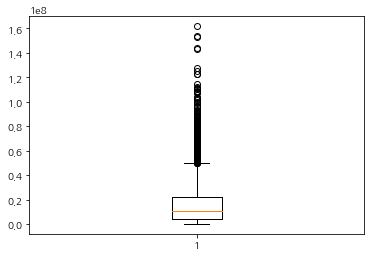

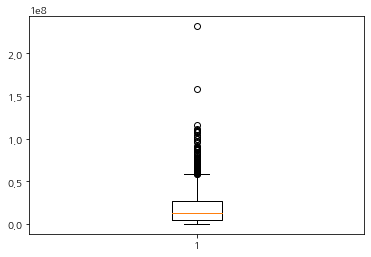

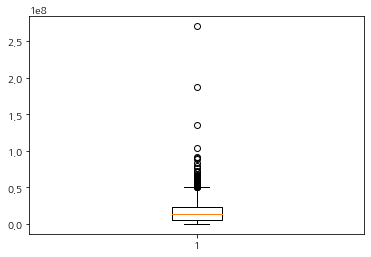

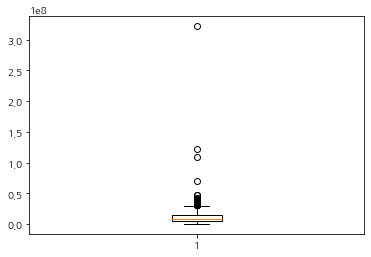

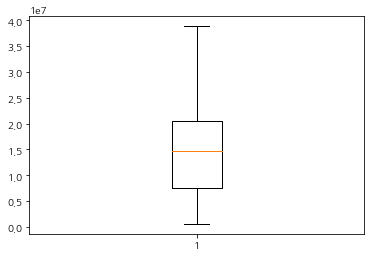

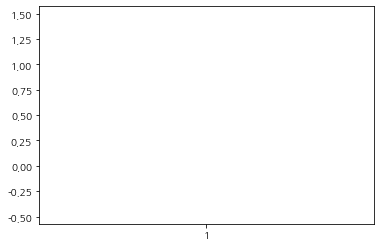

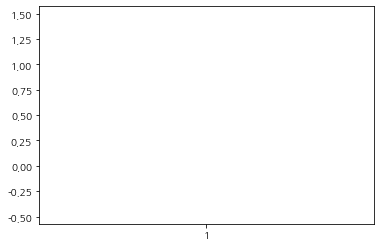

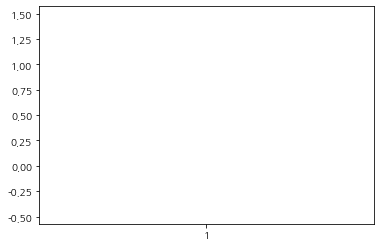

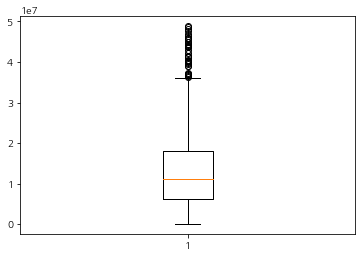

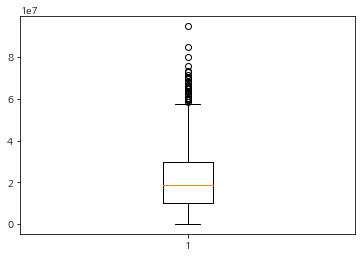

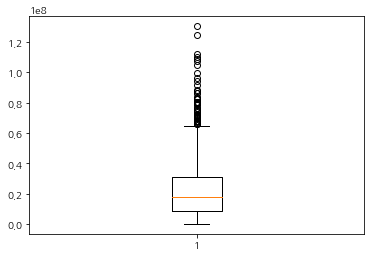

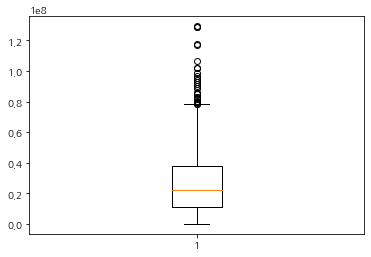

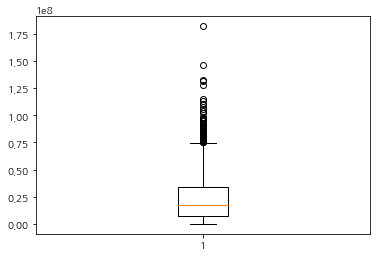

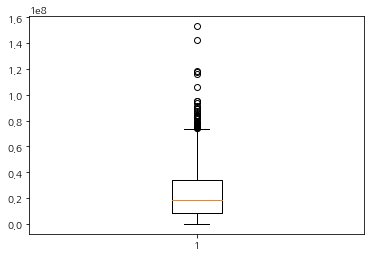

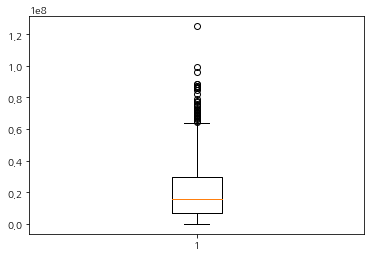

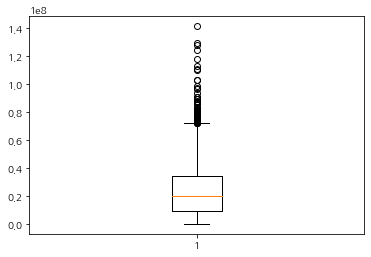

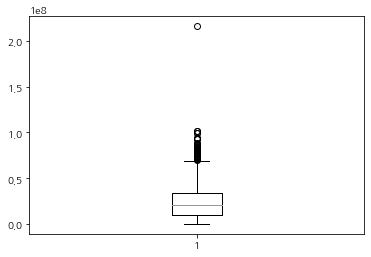

In [304]:
for i in range(24):
    plt.boxplot(perform_df[perform_df['시간대'] == i].dropna()[' 취급액 '].values)
    plt.show()

array([14113000., 32395000., 39669000., ..., 29632000., 34001000.,
       54234000.])

In [292]:
datas = perform_df[perform_df['시간대'] == 0].dropna()[' 취급액 '].values

0    0
dtype: int64

In [278]:
import numpy as np

In [282]:
plt.boxplot(
    list(zip(np.ones(len(datas)), datas)),
    # vert=False, # make the plot vertical 
    notch=True, # if it is False, it will be box
    whis=1.5)

KeyboardInterrupt: 

## 소비자 특성 파악